number of steps and H are 25 0.04


Enter time step (0 to stop):  0.015
Enter total time:  0.00075


time step and time are: 0.00075 0.015
[0.         0.01159111 0.02816666 0.05522918 0.09889833 0.16524344
 0.25870478 0.37983677 0.52308947 0.67570374 0.81873066 0.93053087
 0.99203191 0.99203191 0.93053087 0.81873066 0.67570374 0.52308947
 0.37983677 0.25870478 0.16524344 0.09889833 0.05522918 0.02816666
 0.        ]


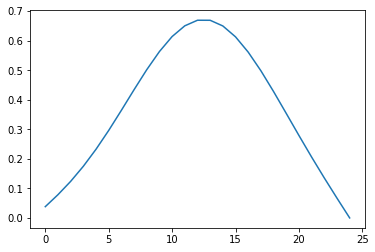

In [7]:
from matplotlib import cm
import matplotlib.pyplot as plt
import cmath, math
import numpy as np

NSTEP = 25                # Total number of domain steps 
H = 1.0/NSTEP             # Spacing
phi = np.zeros(NSTEP)     # Space of PHI
diff = np.zeros(NSTEP)    # Space of Error

print("number of steps and H are", NSTEP, H)

### Function Arrangement
def gauss(x,t):
    return math.exp(-20.0 * (x-0.5)**2/(1.0+80*t))/math.sqrt(1.0+80*t)

def exact(x,t):
    return gauss(x,t) - gauss(x-1.0,t) - gauss(x+1.0,t)

### Calculation
time = input("Enter total time: ")
dt = input("Enter time step (0 to stop): ")
print("time step and time are:", dt, time)

dt = float(dt); time = float(time)

if dt == 0:
    print("dt is zero and program is stopping")
    quit()
    
NITER=int(time/dt)
dth=dt/H**2
t=0; phi[0]=0 ; phi[NSTEP-1]=0

for i in range(0, NSTEP-1):
    phi[i]=exact(i*H, t)
print(phi)

for i in range(0,NITER):
    pold=0
    for j in range(0, NSTEP-1):
        pnew=phi[j] + dth*(pold + phi[j+1] - 2*phi[j])
        pold=phi[j]
        phi[j]=pnew
        diff[j]=phi[j]-exact(j*H,t)

### Visualization 
fig = plt.figure()
fig1 = fig.add_subplot(111)
fig1.plot(range(0,NSTEP), phi)
plt.show()
